<a href="https://colab.research.google.com/github/Shams3DDD/google_colab/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%98%D0%BD%D1%82%D0%B5%D0%B3%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8_%D0%BD%D0%B0_%D0%94%D0%95%D0%9C%D0%9E_%D0%9F%D0%90%D0%9D%D0%95%D0%9B%D0%AC_%7C_%D0%94%D0%97_Lite_%7C_%D0%A3%D0%98%D0%98%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Необходимо создать, обучить нейронную сеть и упаковать её в архив для загрузки на демо-панель:
* создать нейронную сеть для распознавания цифр из MNIST
* сохраните веса (модель)
* подготовить запуск модели "из коробки"
* подготовить архив с готовой нейронной сетью для загрузки в демо-панель


# Загрузка базы

In [2]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam, Adadelta

# Библиотека для работы с массивами
import numpy as np

# Библиотекb для работы с таблицами
import pandas as pd
import json

# Отрисовка графиков
import matplotlib.pyplot as plt

# Связь с google-диском
# from google.colab import files

# Предварительная обработка данных
from sklearn import preprocessing

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from keras.datasets import fashion_mnist

from PIL import Image

from tensorflow.keras.models import load_model


# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

In [3]:
# Загрузка датасета
(x_train_org, y_train_org), (x_test_org, y_test_org) = fashion_mnist.load_data()

# Вывод размерностей выборок

print("Размер x_train:", x_train_org.shape)
print("Размер y_train:", y_train_org.shape)
print("Размер x_test:", x_test_org.shape)
print("Размер y_test:", y_test_org.shape)

4422102/4422102 [==============================] - 2s 1us/step
Размер x_train: (60000, 28, 28)
Размер y_train: (60000,)
Размер x_test: (10000, 28, 28)
Размер y_test: (10000,)


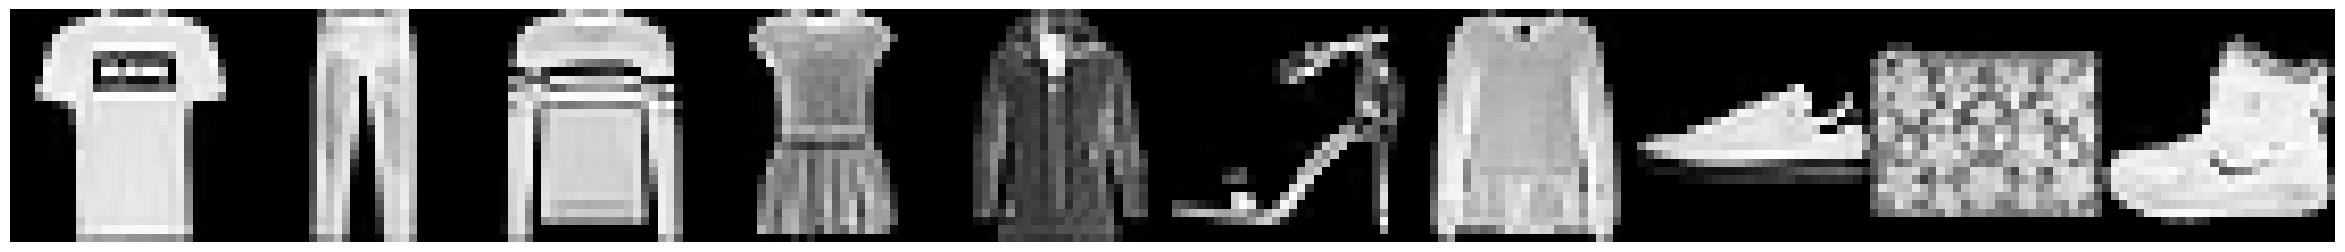

In [4]:
# Выбор 1 изображения каждого класса
imgs = np.array([x_train_org[y_train_org == i][0] for i in range(10)])

# Соединение изображения в одну линию
imgs = np.concatenate(imgs, axis=1)

# Создание поля для изображения
plt.figure(figsize=(30, 6))

# Отрисовка итогового изображения
plt.imshow(imgs, cmap="Greys_r")

# Без сетки
plt.grid(False)

# Без осей
plt.axis("off")

# Вывод результата
plt.show()

# Подготовка данных

In [5]:
# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f"Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}")
print(f"Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}")

Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


In [6]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype("float32") / 255.0

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype("float32") / 255.0

In [7]:
# Задание константы количества распознаваемых классов

CLASS_COUNT = 10

In [8]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [9]:
print(y_train.shape)
print(y_train[0])

(60000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Обучение

In [10]:
# Праметры
act = "relu"
bat = 128
opt = "adam"
epoch = 100

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.5139 - accuracy: 0.8162 - val_loss: 0.3957 - val_accuracy: 0.8601
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3871 - accuracy: 0.8569 - val_loss: 0.3455 - val_accuracy: 0.8719
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3527 - accuracy: 0.8699 - val_loss: 0.3360 - val_accuracy: 0.8731
Epoch 4/100
469/469 [==============================] - 3s 5ms/step - loss: 0.3309 - accuracy: 0.8769 - val_loss: 0.2994 - val_accuracy: 0.8871
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3176 - accuracy: 0.8819 - val_loss: 0.2830 - val_accuracy: 0.8963
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3045 - accuracy: 0.8872 - val_loss: 0.2805 - val_accuracy: 0.8947
Epoch 7/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2964 - accuracy: 0.8888 - val_loss: 0.2617 - val_accuracy: 0.9023

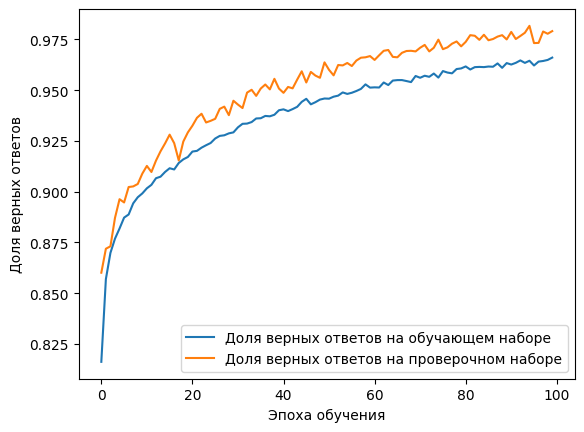

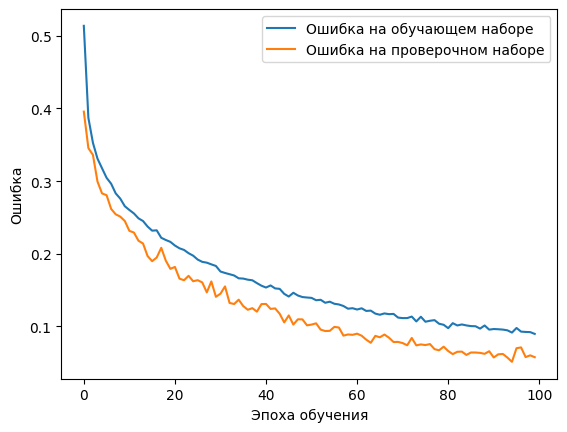

In [11]:
model = Sequential()


model.add(Dense(800, input_dim=x_train.shape[1], activation=act))
model.add(Dropout(0.3))
model.add(Dense(400, activation=act))
model.add(Dense(CLASS_COUNT, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(
    x_train,
    y_train,
    batch_size=bat,
    epochs=epoch,
    validation_data=(x_train[50000:], y_train[50000:]),
    verbose=1,
)

print(model.summary())

plt.plot(history.history["accuracy"], label="Доля верных ответов на обучающем наборе")
plt.plot(
    history.history["val_accuracy"], label="Доля верных ответов на проверочном наборе"
)
plt.xlabel("Эпоха обучения")
plt.ylabel("Доля верных ответов")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Ошибка на обучающем наборе")
plt.plot(history.history["val_loss"], label="Ошибка на проверочном наборе")
plt.xlabel("Эпоха обучения")
plt.ylabel("Ошибка")
plt.legend()
plt.show()

In [12]:
# Вычисление результата (предсказания) сети на тестовом наборе

scores = model.evaluate(x_test, y_test, verbose=1)

print(scores)
print("Доля верных ответов на тестовых данных, в процентах: {:7.4%}".format(scores[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.4444 - accuracy: 0.8998
[0.4444078505039215, 0.8998000025749207]
Доля верных ответов на тестовых данных, в процентах: 89.9800%


In [14]:
# Сохранение обученной модели полностью (веса и архитектура) после всех эпох

model.save("data/model_mnist_all.h5")

/Users/admin/Project/AIuniversity/google_colab/.venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Загрузка модели на сервер

In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np


def predict(img_path="./test_image_1.jpg", model_path="./model_mnist_all.h5"):
    classes = {
        0: "Футболка",
        1: "Брюки",
        2: "Пуловер",
        3: "Платье",
        4: "Пальто",
        5: "Сандалии/Босоножки",
        7: "Кроссовки",
        8: "Сумочка",
        9: "Ботильоны",
    }

    model = load_model(model_path)

    img_width, img_height = 28, 28

    img = Image.open(img_path).resize((img_height, img_width))
    image = np.array(img, dtype="float64") / 255

    image = np.expand_dims(image, axis=0)
    cls_image = np.argmax(model.predict(image))

    print(classes[cls_image])

In [15]:
def fg():
    pass